# Numérique résolution d'un problème de Neumann [SOLUTION]

Mise en oeuvre des élément finis P1 de Lagrange pour l'equation de Laplace suivante, 
\begin{align}
    \left\{
        \begin{array}{rl}
            -\Delta u + u = f, & \text{dans}\ \Omega \\
            \partial_n u = 0, & \text{sur}\ \partial\Omega
        \end{array}
    \right.
\end{align}
avec conditions de Neumann sur le maillage `square.msh`.

## Gestion des imports

In [1]:
# Alias pour numpy et matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Importation des fonctions utilisées dans ce notebook
from numpy.typing import NDArray
from scipy.sparse import dok_array
from scipy.sparse.linalg import spsolve

# Importation d'utilitaires pour simplifier l'utilisation des maillages et
# de l'affichage
from mesh import Mesh, plot_function, plot_mesh, read_msh
from square import square_mesh

%matplotlib inline

## Lecture du maillage et affichage

Info    : Increasing process stack size (8192 kB < 16 MB)
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000382359s, CPU 0.000464s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00132382s, CPU 0.001352s)
Info    : 142 nodes 286 elements
Info    : Writing 'square.msh'...
Info    : Done writing 'square.msh'



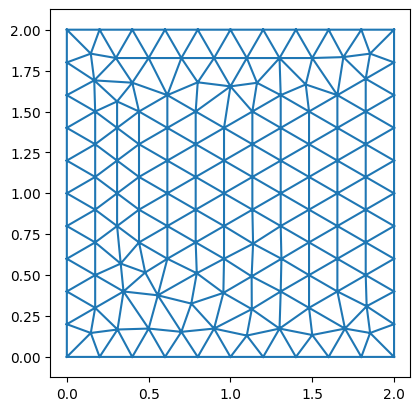

In [2]:
maillage_name = "square"
square_mesh(0.2, filename=maillage_name)  # crée un fichier de maillage nomé square.msh
mesh = read_msh(f"{maillage_name}.msh")  # lit le fichier de maillage

fig, ax = plt.subplots(figsize=(4, 4), layout="constrained")
ax.axis("equal")
plot_mesh(mesh, ax=ax)
plt.show()

## Calcul des matrices EF [À COMPLÉTER]

#### Calul des matrices EF élémentaires [À COMPLÉTER]

In [ ]:
def elem_mat_K(S1: NDArray, S2: NDArray, S3: NDArray, *, tol: float = 1e-8) -> NDArray:
    """Calcul la matrices de raideur elementaire en P1 lagrange.

    NOTE
        (1) le calcul est exacte (pas de condensation de masse)
        (2) calcul direct a partir des formules donnees par les
            coordonnees barycentriques

    Parameters
    ----------
    S1, S2, S3 : les 2 coordonnees des 3 sommets du triangle (vecteurs reels 1x2)

    Returns
    -------
    matrice de raideur elementaire (matrice 3x3)
    """

    # preliminaires, pour faciliter la lecture:
    x1, y1 = S1
    x2, y2 = S2
    x3, y3 = S3

    # les 3 normales a l'arete opposees (de la longueur de l'arete)
    normal = np.array(
        [
            [y2 - y3, x3 - x2],
            [y3 - y1, x1 - x3],
            [y1 - y2, x2 - x1],
        ]
    )

    # D est, au signe pres, deux fois l'aire du triangle
    D = normal[2, 1] * normal[1, 0] - normal[2, 0] * normal[1, 1]

    if abs(D) <= tol:
        raise ValueError("l'aire d'un triangle est nulle !!!")

    # calcul de la matrice de raideur
    K_elem = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            # À COMPLÉTER
            K_elem[i, j] = ...

    return K_elem

In [ ]:
def elem_mat_M(S1: NDArray, S2: NDArray, S3: NDArray, *, tol: float = 1e-8) -> NDArray:
    """calcul la matrices de masse elementaire en P1 lagrange.

    NOTE
        (1) le calcul est exacte (pas de condensation de masse)
        (2) calcul direct a partir des formules donnees par les
            coordonnees barycentriques

    Parameters
    ----------
    S1, S2, S3 : les 2 coordonnees des 3 sommets du triangle (vecteurs reels 1x2)

    Returns
    -------
    matrice de masse elementaire (matrice 3x3)
    """

    # preliminaires, pour faciliter la lecture:
    x1, y1 = S1
    x2, y2 = S2
    x3, y3 = S3

    # D est, au signe pres, deux fois l'aire du triangle
    D = (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)

    if abs(D) <= tol:
        raise ValueError("l'aire d'un triangle est nulle !!!")

    # calcul de la matrice de raideur
    M_elem = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            # À COMPLÉTER
            M_elem[i, j] = ...

    return M_elem

#### Boucle sur les triangles [À COMPLÉTER]

In [ ]:
def mat_KM(mesh: Mesh) -> tuple[NDArray, NDArray]:
    """Calcul la matrices de raideur et de masse en P1 lagrange.

    Parameters
    ----------
    mesh : Mesh
        le maillage

    Returns
    -------
    K la matrice de raideur (matrice sparse de taille nb_nodes x nb_nodes)
    M la matrice de masse (matrice sparse de taille nb_nodes x nb_nodes)
    """
    K = dok_array((mesh.nb_nodes, mesh.nb_nodes), dtype=np.float64)
    M = dok_array((mesh.nb_nodes, mesh.nb_nodes), dtype=np.float64)

    for triangle in mesh.triangles:
        # Coordonnées des sommets du triangles
        # À COMPLÉTER
        S1 = ...
        S2 = ...
        S3 = ...

        # calcul des matrices elementaires du triangle
        K_elem = elem_mat_K(S1, S2, S3)
        M_elem = elem_mat_M(S1, S2, S3)

        # On fait l'assemmblage de la matrice globale et du second membre
        # À COMPLÉTER

    return (K.tocsc(), M.tocsc())


# Calcul des matrices EF
K, M = mat_KM(mesh)

## Calcul du second membre F [À COMPLÉTER]

In [ ]:
def f(x: NDArray, y: NDArray) -> NDArray:
    """Evaluation de la fonction second membre.

    Parameters
    ----------
    x, y : vectors
        les 2 coordonnees du point ou on veut evaluer la fonction.

    Returns
    -------
    vector
        valeur de la fonction sur ce point.
    """
    return ...


F = ...

## Calcul de la solution

In [ ]:
U = spsolve(K + M, F)

## Visualisation

In [ ]:
fig, ax = plt.subplots(layout="constrained", subplot_kw={"projection": "3d"})
U_max = np.abs(U).max()
plot_function(
    U, mesh, ax=ax, kwa_plot={"cmap": "RdYlBu", "vmin": -U_max, "vmax": U_max}
)
plt.show()

## Validation [À COMPLÉTER]

#### Calcul des erreurs relative [À COMPLÉTER]

In [ ]:
def fct_u_excat(x: NDArray, y: NDArray) -> NDArray:
    return np.cos(np.pi * x) * np.cos(2 * np.pi * y)


# Calcul des erreurs relatives L2 et H1
# attention de bien changer le terme source (dans F)
# À COMPLÉTER

#### Graphes des erreurs relative [À COMPLÉTER]

In [ ]:
# Graphes des erreurs relatives L2 et H1
# À COMPLÉTER